In [1]:
!pip install scikit-learn

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# load the CSV file into a DataFrame
spam_df = pd.read_csv('C:/JupyterLab/spam.csv', encoding='latin1')

In [4]:
spam_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# rename columns 'v1' to 'Category' and 'v2' to 'Message'
spam_df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [6]:
# drop unnecessary columns
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
# create a new column 'spam' with numerical data to identify which one is spam/ham
spam_df['spam'] = spam_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [8]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam, test_size=0.3, random_state=42)

In [9]:
# convert text data to numerical data
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [10]:
spam_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [11]:
# train the Naive Bayes model
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [13]:
# test the model with some example emails
email_ham = ["How are you doing? Want to have some drinks?"]
email_spam = ["You win an iPhone 15, click here to collect your reward."]
email_ham_count = cv.transform(email_ham)
email_spam_count = cv.transform(email_spam)
print("Ham prediction:", model.predict(email_ham_count))
print("Spam prediction:", model.predict(email_spam_count))

Ham prediction: [0]
Spam prediction: [1]


In [15]:
# evaluate the model on the test data - model accuracy = 99%
x_test_count = cv.transform(x_test)
accuracy = model.score(x_test_count, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9820574162679426


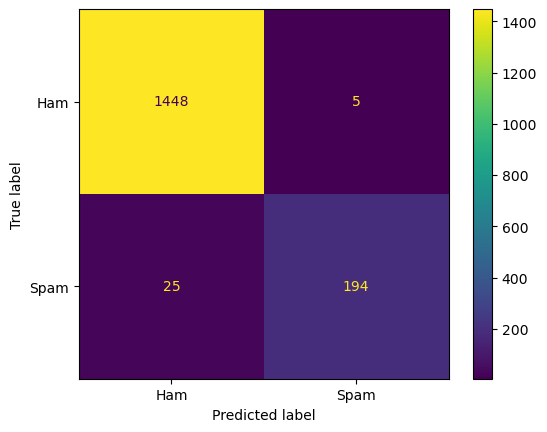

In [16]:
# display the confusion matrix
y_pred = model.predict(x_test_count)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot()
plt.show()

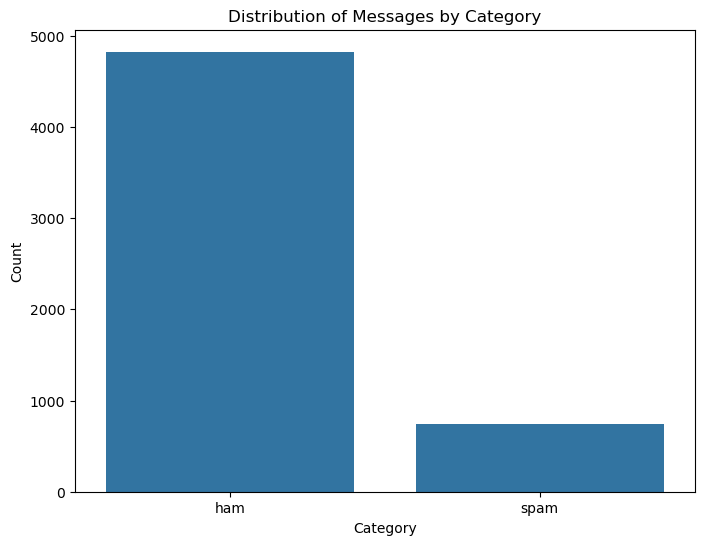

In [17]:
# visualize the distribution of ham/spam emails
plt.figure(figsize=(8, 6))
sns.barplot(x=['ham', 'spam'], y=spam_df['Category'].value_counts())
plt.title('Distribution of Messages by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()